In [1]:
#Titanic Dataset Analysis DS Lab1 

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('titanic.csv')

In [7]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [10]:
data.isnull().sum() 

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [35]:
# Since we want to perform analysis on class, sex, survived and they don't have null value we are not modifying data set right now

In [11]:
# Frequency Table of Categorical Variable

In [22]:
class_order = ['First', 'Second', 'Third']
freq = data['class'].value_counts().reindex(class_order)
freq_table = freq.reset_index()
freq_table.columns = ['Class', 'Absolute Frequency']

freq_table

,Class,Absolute Frequency
0,First,216
1,Second,184
2,Third,491


In [23]:
freq_table['Relative Frequency (%)'] = round((freq_table['Absolute Frequency'] / freq_table['Absolute Frequency'].sum()) * 100, 2)
freq_table

,Class,Absolute Frequency,Relative Frequency (%)
0,First,216,24.24
1,Second,184,20.65
2,Third,491,55.11


In [24]:
freq_table['Cumulative Frequency'] = freq_table['Absolute Frequency'].cumsum()
freq_table

,Class,Absolute Frequency,Relative Frequency (%),Cumulative Frequency
0,First,216,24.24,216
1,Second,184,20.65,400
2,Third,491,55.11,891


In [25]:
# Two-Way Table of sex vs survived 

In [28]:
sex_survived_table = pd.crosstab(data['sex'], data['survived'])
sex_survived_table.columns = ['Not Survived', 'Survived']
sex_survived_table

,Not Survived,Survived
sex,,
female,81,233
male,468,109


In [33]:
sex_survived_table['Total'] = sex_survived_table['Not Survived'] + sex_survived_table['Survived']
sex_survived_table

,Not Survived,Survived,Total
sex,,,
female,81,233,314
male,468,109,577


In [34]:
# Joint Probability

In [50]:
total = len(data)
joint_prob_female_survived = len(data[(data['sex'] == 'female') & (data['survived'] == 1)]) / total
print(f"Joint Probability P(female and survived): {joint_prob_female_survived:.4f}")

Joint Probability P(female and survived): 0.2615


In [37]:
# Marginal Probability

In [48]:
marginal_prob_female = len(data[(data['sex'] == 'female')]) / total
print(f"Marginal Probability P(female) : {marginal_prob_female :.4f}")

Marginal Probability P(female) : 0.3524


In [49]:
marginal_prob_survived = len(data[(data['survived'] == 1)]) / total
print(f"Marginal Probability P(survived) : {marginal_prob_survived :.4f}")

Marginal Probability P(survived) : 0.3838


In [40]:
# Conditional Probability

In [53]:
cond_prob_survived_female = len(data[(data['sex'] == 'female') & (data['survived'] == 1)]) / len(data[data['sex'] == 'female'])
print(f"Conditional Probability P(Survived = 1 | Sex = female) : {cond_prob_survived_female :.4f}")

Conditional Probability P(Survived = 1 | Sex = female) : 0.7420


In [54]:
cond_prob_female_survived = len(data[(data['sex'] == 'female') & (data['survived'] == 1)]) / len(data[data['survived'] == 1])
print(f"Conditional Probability P(Survived = 1 | Sex = female) : {cond_prob_female_survived :.4f}")

Conditional Probability P(Survived = 1 | Sex = female) : 0.6813


In [55]:
#Correlation Analysis

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
data_corr = data[['age', 'fare']].dropna()

In [60]:
correlation_matrix = data_corr.corr(method='pearson')
print(correlation_matrix)

           age      fare
age   1.000000  0.096067
fare  0.096067  1.000000


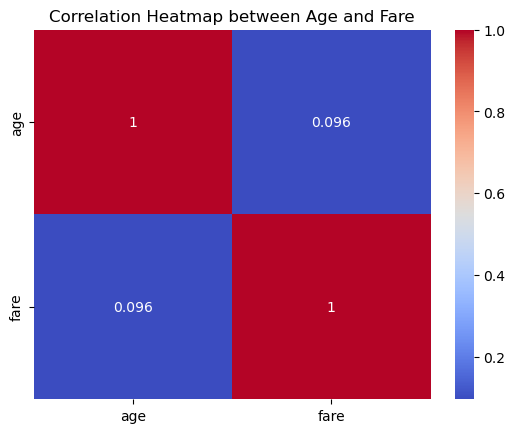

In [61]:
#Heatmap Vitualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between Age and Fare')
plt.show()

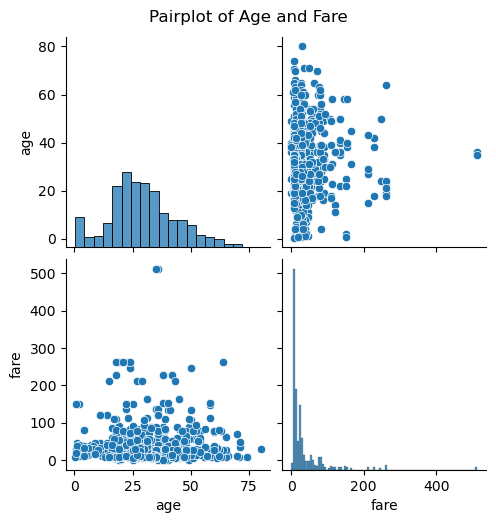

In [69]:
#Pairplot Vitualization
sns.pairplot(data_corr)
plt.suptitle("Pairplot of Age and Fare", y=1.03)
plt.show()

In [70]:
#ScatterPlot Vitualization

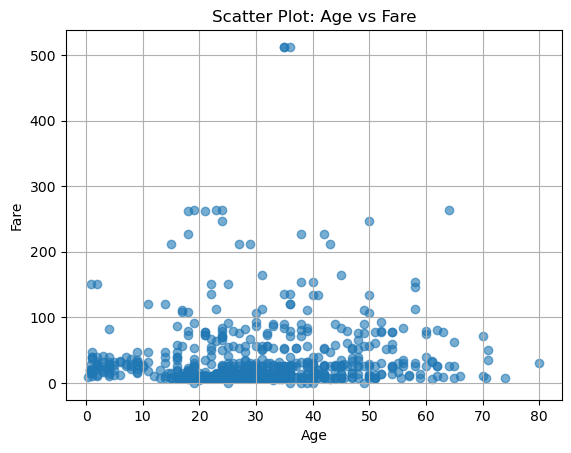

In [72]:
plt.scatter(data_corr['age'], data_corr['fare'], alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot: Age vs Fare')
plt.grid(True)
plt.show()

In [75]:
#Interpretation
# We noticed that the relation betwen the age and fare is weak 
# as correlation matrix value tells this as it is around 0.096 and 
# we can also see that fare doesn't change with changing age it's generally low!